# July --th, 2021

**Motivation**: Cleanup ***SVINET*** results, **showcase** plotting functions <br>


In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
svinet_ws = pjoin(os.environ['HOME'], 'Documents/workspaces/svinet')


# GitHub
sys.path.insert(0, pjoin(git_dir, 'Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.svinet import *
from utils.plotting import *
from utils.render import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Mice & Net

In [2]:
mice = Mice(Config(256))
mice.combine_dfs('rest')

key = 'sub-SLC'
metric = 'spearman'
mode = 'bold'
net = Network(
    mice=mice,
    key=key,
    metric=metric,
    mode=mode,
    percentiles=np.linspace(50, 10, 5).astype(int),
    binarize=False,
).fit()

  0%|          | 0/5 [00:00<?, ?it/s]

...merging dicts: 0it [00:00, ?it/s]

...merging dicts: 0it [00:00, ?it/s]

...merging dicts: 0it [00:00, ?it/s]

...merging dicts: 0it [00:00, ?it/s]

...merging dicts: 0it [00:00, ?it/s]

## SVINET

In [9]:
perc = 20
num_comm = 5
expt_name = next(k for k in net.graphs if f"p{perc}" in k)

### - either: load fits

current expt name: 'bold_spearman_sub-SLC_n256_p30'

[PROGRESS] loading 'k6-cosine-linksampling-(2021_07_14)' from
'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-256/results/SVINET/b
old_spearman_sub-SLC_n256_p30'

  0%|          | 0/100 [00:00<?, ?it/s]

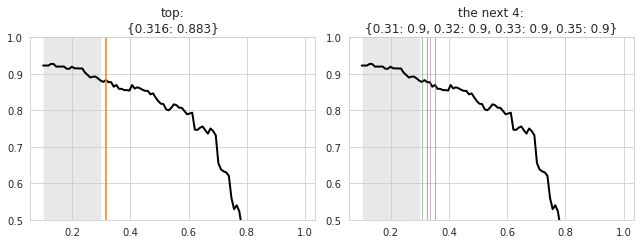

[PROGRESS] process results: done

[PROGRESS] 942 results loaded

00 - 00:00:15  (dd - hh:mm:ss)

In [4]:
start = time()
svinet = SVINET(
    net=net,
    num_k=num_comm,
    expt_name=expt_name,
    match_metric='cosine',
    load_kws='linksampling',
).load_resuts()
end = time()

convert_time(end - start)

In [5]:
os.listdir(svinet.path)

['centrality_plots', 'perf.df', 'figs', 'render', 'result.npy', 'pi_cut.df']

In [6]:
svinet.path.split('/')

[
    '',
    'home',
    'hadi',
    'Documents',
    'Ca-fMRI',
    'processed',
    'norm-global_parcel-spatial-sym_n-256',
    'results',
    'SVINET',
    'bold_spearman_sub-SLC_n256_p30',
    'k6-cosine-linksampling-(2021_07_14)'
]

In [7]:
len(svinet.get_result_dict())

942

### - or: fit

current expt name: 'bold_spearman_sub-SLC_n256_p20'

some runs with k != 5 were excluded:
16 x k = 4

[PROGRESS] experiment loaded: 'bold_spearman_sub-SLC_n256_p20',  total # runs:  9984

[PROGRESS] fit: initiated

[PROGRESS] kmeans fit: done

...merging dicts: 0it [00:00, ?it/s]

[PROGRESS] find best mappings: done

[PROGRESS] results aligned: done

  0%|          | 0/9984 [00:00<?, ?it/s]

...merging dicts: 0it [00:00, ?it/s]

[PROGRESS] membership df: done

[PROGRESS] 'result.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-256/results/SVINET/bo
ld_spearman_sub-SLC_n256_p20/k5-cosine-linksampling-(2021_07_14)

[PROGRESS] 'perf.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-256/results/SVINET/bo
ld_spearman_sub-SLC_n256_p20/k5-cosine-linksampling-(2021_07_14)

[PROGRESS] 'pi_cut.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-256/results/SVINET/bo
ld_spearman_sub-SLC_n256_p20/k5-cosine-linksampling-(2021_07_14)

  0%|          | 0/100 [00:00<?, ?it/s]

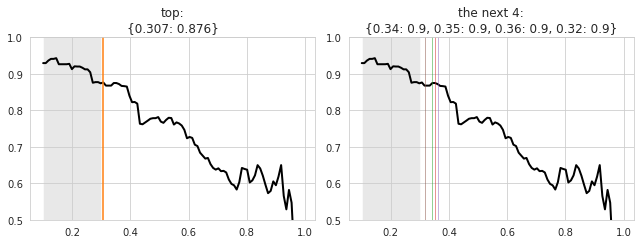

[PROGRESS] process results: done

[PROGRESS] fit: done!

00 - 00:03:44  (dd - hh:mm:ss)

In [10]:
start = time()
svinet = SVINET(
    net=net,
    num_k=num_comm,
    expt_name=expt_name,
    match_metric='cosine',
    load_kws='linksampling',
).load_runs(svinet_ws).fit(repeats=1)
end = time()

convert_time(end - start)

In [7]:
scores = svinet.pi_symmetry_score()
np.mean(list(scores.values())), scores

(0.9031666666666668, {1: 0.976, 2: 0.818, 3: 0.973, 4: 0.798, 5: 0.97, 6: 0.884})

In [8]:
svinet.entropy_score()

0.876

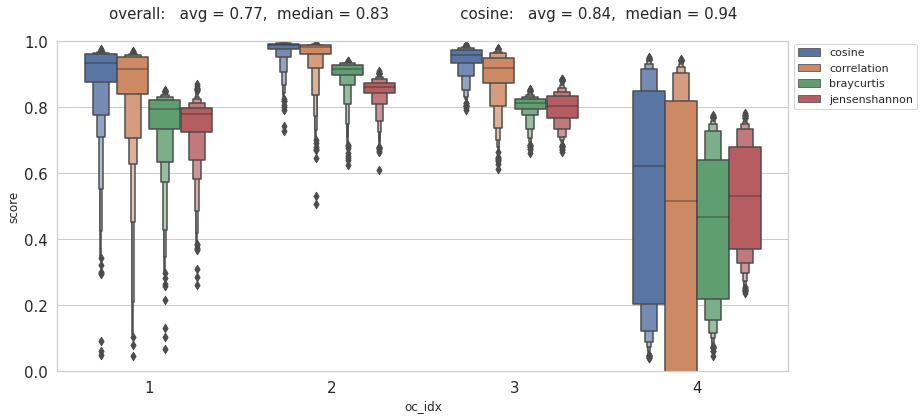

In [109]:
_ = svinet.plot_performance()

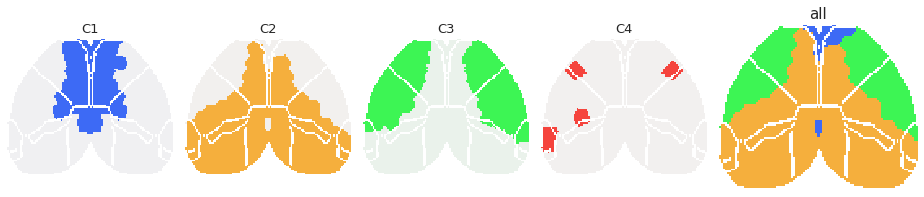

In [110]:
_ = svinet.plot_communities_2d(disjoint=True)

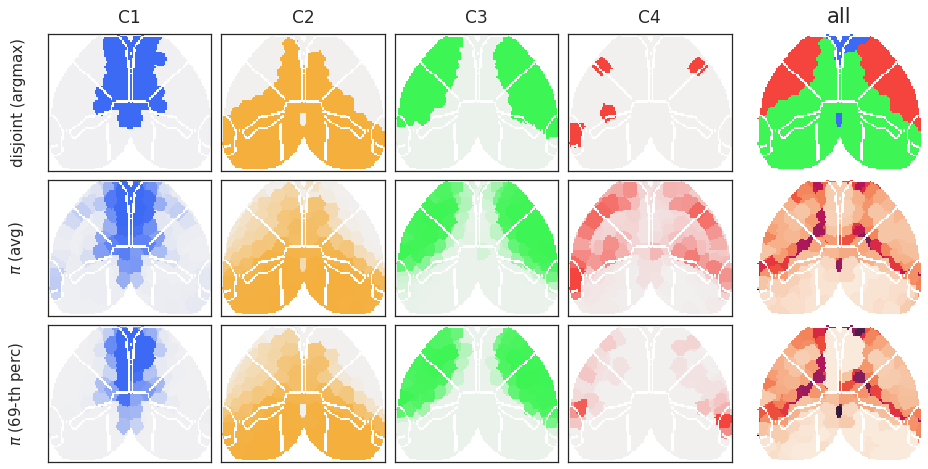

In [111]:
_ = svinet.plot_memberships_2d()

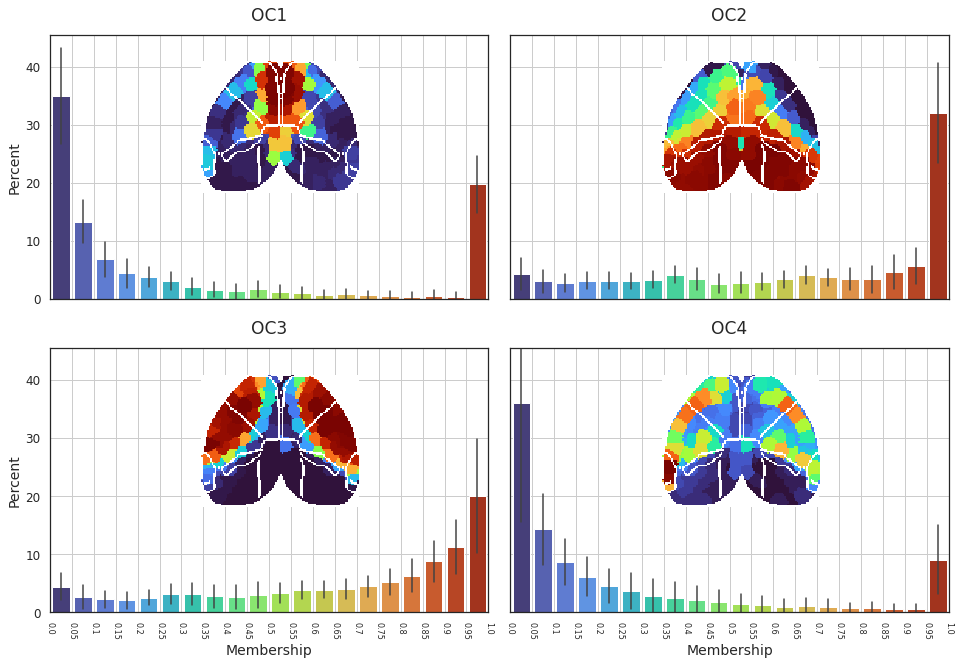

In [112]:
_ = svinet.plot_memberships('bar')

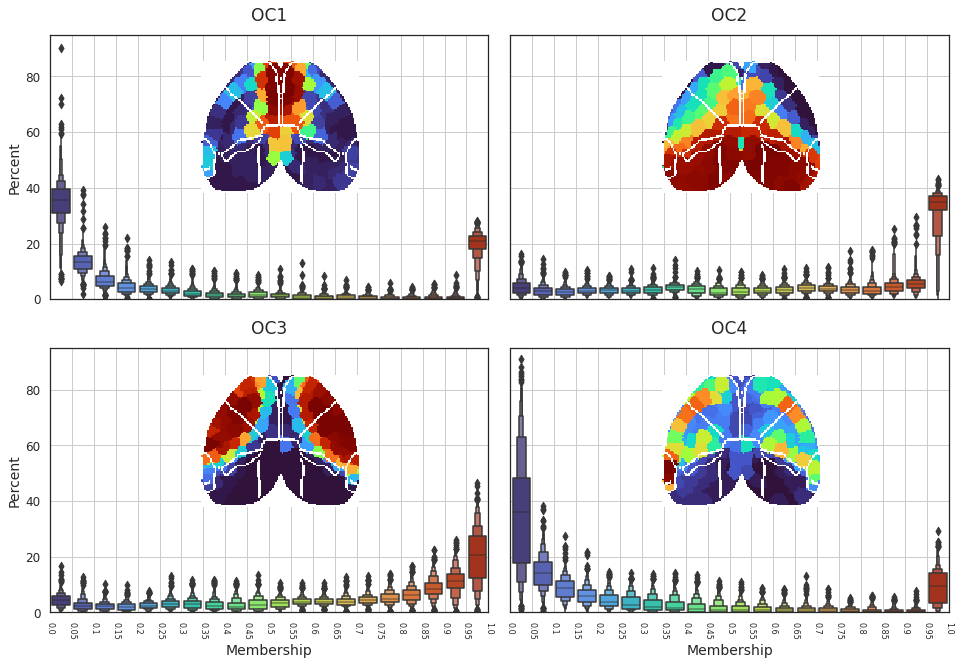

In [113]:
_ = svinet.plot_memberships('box')

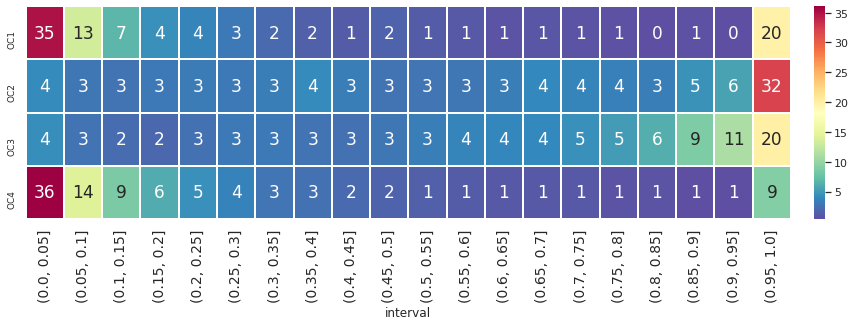

In [114]:
_ = svinet.plot_membership_heatmap(ytick_labelsize=9)

In [115]:
svinet.clusters

STR C_3 100% PAL C_4 100% OLF C_1 100% CTXsp C_3 50% C_4 50% HPF C_4 100% VIS C_2 95% TEa C_2 54% C_3 28% C_4 9% PERI C_3 31% C_2 31% C_4 23% ECT C_3 38% C_2 28% C_4 25% RSP C_2 80% C_1 14% AUD C_2 66% C_3 26% PTLp C_2 96% VISC C_3 92% SS C_3 70% C_2 20% C_1 4% C_4 1% SSp C_3 64% C_2 24% C_1 6% C_4 2% SSp-bfd C_3 49% C_2 41% C_4 5% SSp-ll C_2 52% C_1 45% C_3 2% SSp-m C_3 95% SSp-n C_3 95% SSp-tr C_2 90% C_1 6% C_3 2% C_4 1% SSp-ul C_3 74% C_2 14% C_1 9% SSp-un C_3 71% C_2 21% C_4 5% SSs C_3 84% C_2 9% GU C_3 93% ACA C_1 76% C_2 20% AI C_3 78% C_4 12% C_1 1% MO C_3 59% C_2 23% C_1 16% MOp C_3 73% C_1 12% C_2 12% MOs C_3 46% C_2 32% C_1 19% ILA C_1 96% PL C_1 96% C_2 2% ORB C_1 79% C_3 18% FRP C_1 72% C_3 27%

In [13]:
svinet.render(cortex_only=True)
svinet.render(cortex_only=False)

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-256/re
sults/SVINET/bold_spearman_sub-SLC_n256_p30/k6-cosine-linksampling-(2021_07_14)/render/overla
p_cortex_k6.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-256/re
sults/SVINET/bold_spearman_sub-SLC_n256_p30/k6-cosine-linksampling-(2021_07_14)/render/disjoi
nt_cortex_k6.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-256/re
sults/SVINET/bold_spearman_sub-SLC_n256_p30/k6-cosine-linksampling-(2021_07_14)/render/overla
p_brain_k6.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-256/re
sults/SVINET/bold_spearman_sub-SLC_n256_p30/k6-cosine-linksampling-(2021_07_14)/render/disjoi
nt_brain_k6.html

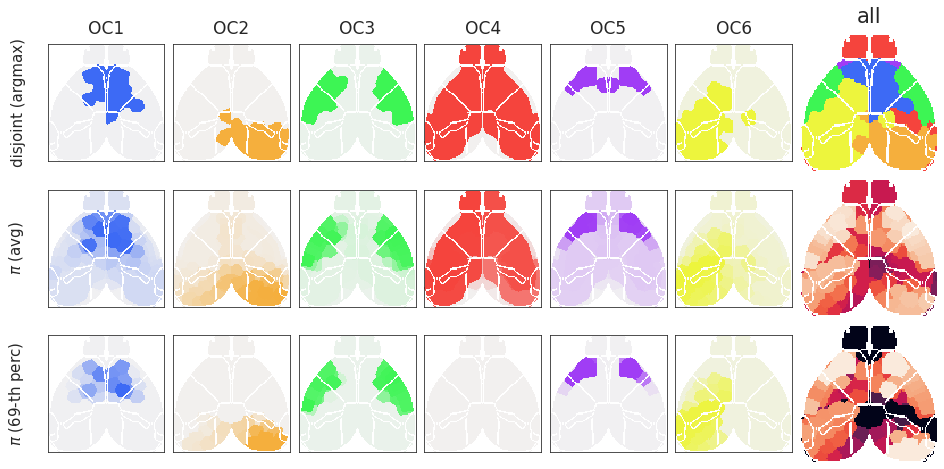

In [17]:
# fig, axes = svinet.plot_memberships_2d(cortex_only=False)

In [59]:
scores = svinet.pi_symmetry_score()
np.mean(list(scores.values())), scores

(0.954, {1: 0.97, 2: 0.963, 3: 0.975, 4: 0.928, 5: 0.934})

## Entropy

In [60]:
svinet.entropy_score()

0.931

In [61]:
selected_measures = [
    'degree_w',
    'closeness',
    'betweenness_w',
    'eigenvector_w',
]
cent_df = net.centralities[svinet.expt_name]
cent_df = cent_df.loc[cent_df.measure.isin(selected_measures)]
cent_df = pd.concat([
    pd.DataFrame({
        'name': [svinet.expt_name] * len(svinet.h),
        'measure': ['entropy'] * len(svinet.h),
        'node': range(len(svinet.h)),
        'centrality': svinet.h, }),
    cent_df,
])
cent_df = pd.concat([cent_df, pd.DataFrame(columns=['oc_idx'])], axis=1)
partition = {n: i + 1 for n, i in enumerate(np.argmax(svinet.pi, axis=0))}
for n, idx in partition.items():
    cent_df.loc[cent_df.node == n, 'oc_idx'] = idx

_df = cent_df.groupby(['node', 'measure']).mean().unstack()
_df = _df.centrality

_df = pd.concat([_df, pd.DataFrame({'oc_idx': partition})], axis=1)

In [62]:
collections.Counter(_df.oc_idx).most_common()

[(3, 111), (2, 91), (1, 43), (5, 18), (4, 3)]

In [63]:
svinet.num_k

5

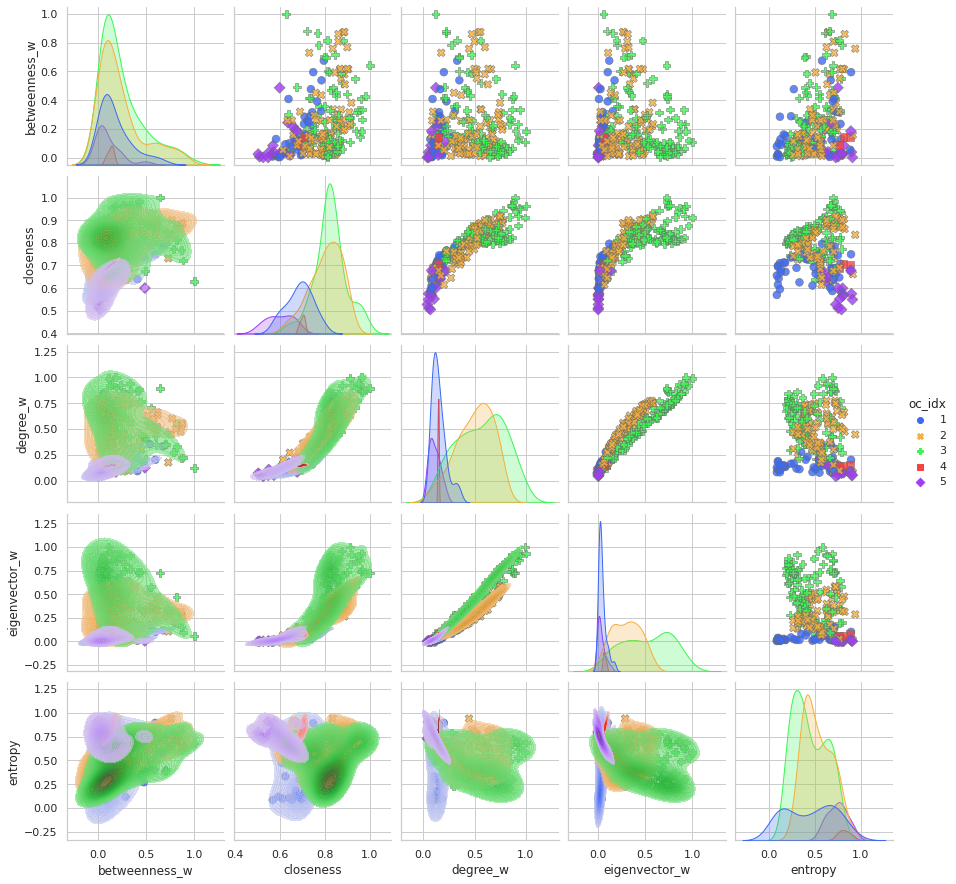

In [66]:
sns.set_theme(style='whitegrid', palette='deep')
save_dir = svinet.get_save_path('centrality_plots')

pg = sns.pairplot(
    data=_df,
    hue='oc_idx',
    markers=['o', 'X', 'P', 's', 'D'] ,#  'p'],
    palette=svinet.colors,
    plot_kws={'alpha': 0.8, 's': 60, 'edgecolor': 'dimgrey'},
)
pg.map_lower(
    func=sns.kdeplot,
    levels=50,
    color=".2",
    fill=True,
    alpha=0.6,
)
file = pjoin(save_dir, 'pair.pdf')
pg.savefig(file, bbox_inches='tight')

plt.show()

In [67]:
selected_measures = [
    'degree',
    'degree_w',
    'betweenness',
    'betweenness_w',
    'eigenvector',
    'eigenvector_w',
    'closeness',
]
cent_df = net.centralities[svinet.expt_name]
cent_df = cent_df.loc[cent_df.measure.isin(selected_measures)]
cent_df = pd.concat([
    pd.DataFrame({
        'name': [svinet.expt_name] * len(svinet.h),
        'measure': ['entropy'] * len(svinet.h),
        'node': range(len(svinet.h)),
        'centrality': svinet.h, }),
    cent_df,
])
cent_df = pd.concat([cent_df, pd.DataFrame(columns=['oc_idx'])], axis=1)
partition = {n: i + 1 for n, i in enumerate(np.argmax(svinet.pi, axis=0))}
for n, idx in partition.items():
    cent_df.loc[cent_df.node == n, 'oc_idx'] = idx

_df = cent_df.groupby(['node', 'measure']).mean().unstack()
_df = _df.centrality

_df = pd.concat([_df, pd.DataFrame({'oc_idx': partition})], axis=1)

In [68]:
sns.set_theme(style='white', palette='deep')
save_dir = svinet.get_save_path('centrality_plots')

all_measures = cent_df.measure.unique().tolist()
all_measures.remove('entropy')
for measure in all_measures:
    _df = cent_df.loc[cent_df.measure.isin([measure, 'entropy'])]
    _df = _df.groupby(['node', 'measure']).mean().unstack()
    _df = _df.centrality
    
    jg = sns.JointGrid(
        data=_df,
        x='entropy',
        y=measure,
        space=0,
    )
    jg.plot_joint(
        sns.kdeplot,
        fill=True,
        clip=((0, 1), (0, 1.0)),
        thresh=0.,
        levels=20,
        gridsize=200,
        cmap="rocket",
    )
    jg.plot_marginals(
        sns.histplot,
        color='#03051A',
        alpha=0.8,
        bins=40,
    )
    jg.ax_joint.axvline(
        x=np.median(svinet.h),
        ls=':',
        lw=0.8,
        alpha=1.0,
        c=sns.color_palette('deep')[-1],
        label=f"entropy median: {np.median(svinet.h):.2f}",
    )
    jg.ax_joint.legend(loc='upper left', prop={'size': 8})

    file = pjoin(save_dir, f"{measure}_density.pdf")
    jg.savefig(file)
    plt.close()

In [69]:
sns.set_theme(style='white', palette='deep')
save_dir = svinet.get_save_path('centrality_plots')

all_measures = cent_df.measure.unique().tolist()
all_measures.remove('entropy')
for measure in all_measures:
    _df = cent_df.loc[cent_df.measure.isin([measure, 'entropy'])]
    _df = _df.groupby(['node', 'measure']).mean().unstack()
    _df = _df.centrality
    _df = pd.concat([_df, pd.DataFrame({'oc_idx': partition})], axis=1)
    
    jg = sns.JointGrid(
        data=_df,
        x='entropy',
        y=measure,
        hue='oc_idx',
        size=8,
        palette=svinet.colors,
        xlim=(0, 1),
        ylim=(0, 1),
        space=0.0,
    )
    jg.plot_joint(
        sns.scatterplot,
        hue='oc_idx',
        s=180,
        alpha=0.9,
        edgecolor='dimgrey',
    )
    jg.plot_marginals(
        sns.kdeplot,
        fill=True,
        alpha=0.5,
        lw=2,
    )
    jg.ax_joint.axvline(
        x=np.median(svinet.h),
        ls='--',
        lw=2,
        alpha=1.0,
        c=sns.color_palette('deep')[7],
        label=f"entropy median: {np.median(svinet.h):.2f}",
        zorder=0,
    )
    jg.ax_joint.legend(loc='upper left', prop={'size': 9})
    
    file = pjoin(save_dir, f"{measure}_scatter.pdf")
    jg.savefig(file)
    plt.close()

In [70]:
sns.set_theme(style='white', palette='deep')
save_dir = svinet.get_save_path('centrality_plots')

all_measures = cent_df.measure.unique().tolist()
all_measures.remove('entropy')
for measure in all_measures:
    _df = cent_df.loc[cent_df.measure.isin([measure, 'entropy'])]
    _df = _df.groupby(['node', 'measure']).mean().unstack()
    _df = _df.centrality
    _df = pd.concat([_df, pd.DataFrame({'oc_idx': partition})], axis=1)
    
    jg = sns.JointGrid(
        data=_df,
        x='entropy',
        y=measure,
        hue='oc_idx',
        size=8,
        palette=svinet.colors,
        xlim=(0, 1),
        ylim=(0, 1),
        space=0.0,
    )
    jg.plot_joint(
        sns.histplot,
        bins=30,
        alpha=0.9,
    )
    jg.plot_marginals(
        sns.kdeplot,
        fill=True,
        alpha=0.5,
    )
    jg.ax_joint.axvline(
        x=np.median(svinet.h),
        ls='--',
        lw=2,
        alpha=1.0,
        c=sns.color_palette('deep')[7],
        label=f"entropy median: {np.median(svinet.h):.2f}",
    )
    jg.ax_joint.legend(loc='upper left', prop={'size': 9})
    
    file = pjoin(save_dir, f"{measure}_histogram.pdf")
    jg.savefig(file)
    plt.close()

In [71]:
svinet.prepare_plot_material(cortex_only=True)

cent_vec = {
    m: {
        region: cent_df.loc[cent_df.measure == m, 'centrality'].values[n]
        for n, region in svinet.net.n2l.items()
    } for m in cent_df.measure.unique()
}
cent_vol = vec2vol(cent_vec, net.mice)

if svinet.plot_cortex_only:
    cent_vol = {
        idx: v * net.mice.allen['isocortex_mask']
        for idx, v in cent_vol.items()
    }
    
list(cent_vol)

[
    'entropy',
    'degree_w',
    'degree',
    'eigenvector',
    'eigenvector_w',
    'closeness',
    'betweenness',
    'betweenness_w'
]

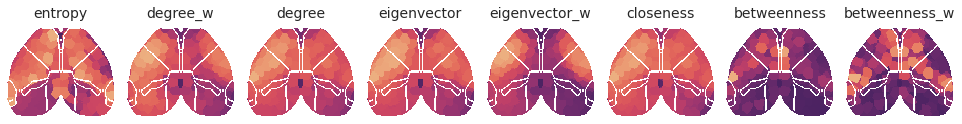

In [72]:
fig, axes = create_figure(1, len(cent_vol), (13.5, 5))

sns.set_theme(style='white', palette='deep')
save_dir = svinet.get_save_path('centrality_plots')

for ax, (k, m) in zip(axes, cent_vol.items()):
    cent_arr = project_vol_2d(
        vol_data={k: m},
        dims_flat=net.mice.allen['dims_flat'],
        mode='max_proj',
    )

    if svinet.plot_cortex_only:
        mask = svinet.net.mice.parcel.results2d['parcel']
    else:
        mask = svinet.net.mice.parcel.results2d['atlas']
    cent_arr = svinet._trim(cent_arr, mask)

    data2plt = np.ma.masked_where(svinet.contour2d, cent_arr)
    ax.imshow(data2plt, cmap='flare_r')
    ax.set_title(k, fontsize=14, y=1.05)
remove_ticks(axes)
file = pjoin(save_dir, f"centralities_2d.pdf")
fig.savefig(file, bbox_inches='tight')
plt.show()

In [73]:
svinet.path.split('/')[-3:]

[
    'SVINET',
    'bold_spearman_sub-SLC_n256_p30',
    'k5-cosine-linksampling-(2021_07_14)'
]

In [74]:
js_dist = sp_dist.pdist(svinet.pi.T, metric='jensenshannon')
js_dist = sp_dist.squareform(js_dist)
js_sim = 1 - js_dist

community = {
    idx: [net.l2n[region] for region in x]
    for idx, x in svinet.disjoint_community().items()
}

low_thres = np.quantile(svinet.h, 0.1)
high_thres = np.quantile(svinet.h, 0.9)

dict_list = []
for i, j, data in net.graphs[svinet.expt_name].edges(data=True):
    c_i = next(idx for idx, x in community.items() if i in x)
    c_j = next(idx for idx, x in community.items() if j in x)
    link = 'within' if c_i == c_j else 'across'
    
    if svinet.h[i] > high_thres:
        entropy_i = 'high'
    elif svinet.h[i] < low_thres:
        entropy_i = 'low'
    else:
        entropy_i = 'mid'
    
    if svinet.h[j] > high_thres:
        entropy_j = 'high'
    elif svinet.h[j] < low_thres:
        entropy_j = 'low'
    else:
        entropy_j = 'mid'
        
    if entropy_i == entropy_j:
        entropy = entropy_i
    else:
        entropy = '-'.join(sorted([entropy_i, entropy_j]))
    
    data_dict = {
        'i': [i],
        'j': [j],
        'c_i': [c_i],
        'c_j': [c_j],
        'link': [link],
        'entropy': [entropy], 
        'weight': [data['weight']],
        'js_dist': [js_dist[i, j]],
        'js_sim': [js_sim[i, j]],
    }
    dict_list.append(data_dict)
df = pd.DataFrame(merge_dicts(dict_list))

...merging dicts: 0it [00:00, ?it/s]

<AxesSubplot:xlabel='js_sim', ylabel='weight'>

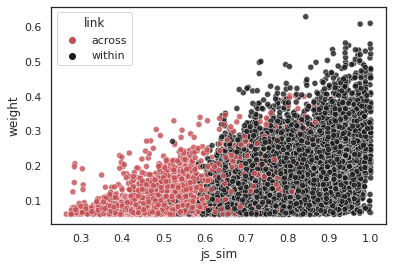

In [75]:
sns.scatterplot(
    data=df,
    y='weight',
    x='js_sim',
    hue='link',
    palette={'across': 'r', 'within': 'k'},
    alpha=0.8,
)

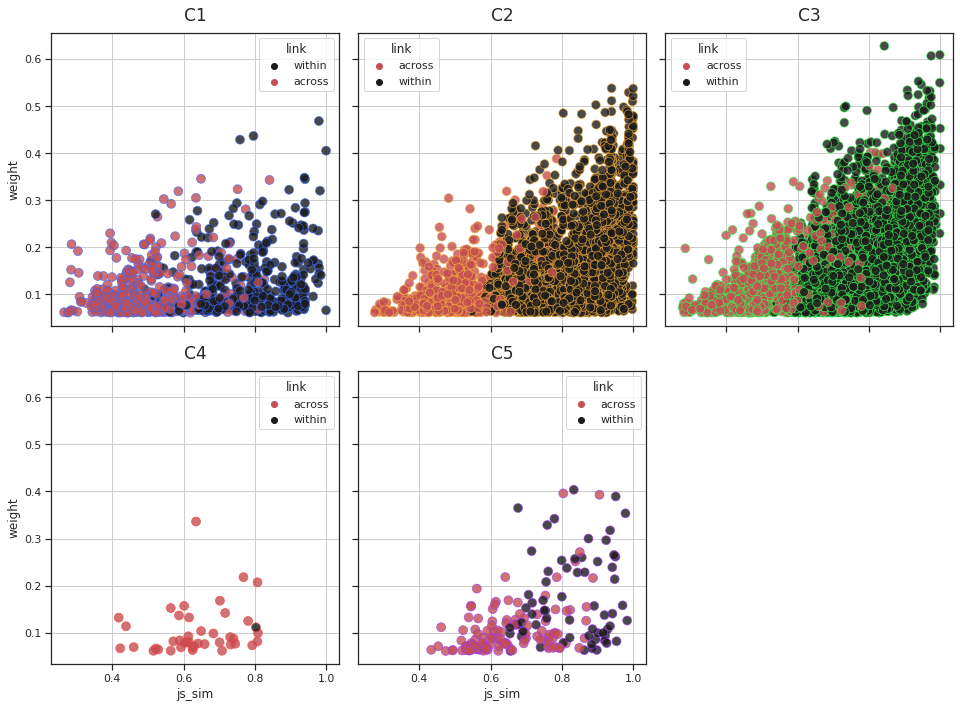

In [76]:
fig, axes = create_figure(2, 3, (13.5, 10), 'ticks', 'all', 'all')
save_dir = svinet.get_save_path('centrality_plots')

for ax, idx in zip(axes.ravel(), range(1, svinet.num_k + 1)):
    _df = df.loc[df.c_i == idx]
    sns.scatterplot(
        data=_df,
        y='weight',
        x='js_sim',
        hue='link',
        s=80,
        edgecolor=svinet.colors[idx],
        palette={'across': 'r', 'within': 'k'},
        alpha=0.8,
        ax=ax,
    )
    ax.set_title(f"C{idx}", fontsize=17, y=1.02)
    # ax.axhline(net.thresholds[perc])
    ax.grid()
trim_axs(axes, svinet.num_k)
file = pjoin(save_dir, 'JS_vs_weight.pdf')
fig.savefig(file, bbox_inches='tight')
plt.show()

In [ ]:
community = {
    idx: [net.l2n[region] for region in x]
    for idx, x in svinet.disjoint_community().items()
}

dict_list = []
for lbl, f in net._group_centrality_fn.items():
    for idx, comm_list in community.items():
        data_dict = {
            'measure': [lbl],
            'oc_idx': [idx],
            'centrality': [f(net.graphs[svinet.expt_name], comm_list)],
        }
        dict_list.append(data_dict)
grp_cent_df = pd.DataFrame(merge_dicts(dict_list))

In [ ]:
fig, ax = create_figure(1, 1, (8, 5), 'ticks')
sns.barplot(
    data=grp_cent_df,
    x='measure',
    y='centrality',
    hue='oc_idx',
    palette=svinet.colors,
    saturation=0.7,
    ax=ax,
)
plt.show()

In [282]:
_df = grp_cent_df.groupby(['oc_idx', 'measure']).mean().unstack()
_df = _df.centrality
_df

measure,group_betweenness,group_closeness,group_degree
oc_idx,,,
1,0.028840,0.677778,0.524590
2,0.080407,0.722628,0.646465
3,0.201496,0.809524,0.764706
4,0.074770,0.748538,0.695312
5,0.014117,0.583333,0.323308
6,0.007198,0.627551,0.406504


In [352]:
a = np.quantile(svinet.h, 0.25)
b = np.quantile(svinet.h, 0.75)
a, b

(0.41991571836164504, 0.7364948448404033)

In [353]:
low_ent = np.where(svinet.h < a)[0]
high_ent = np.where(svinet.h > b)[0]
svinet.h[low_ent].mean(), svinet.h[high_ent].mean()

(0.3180719123365593, 0.7909467492327872)

In [326]:
dict_list = []
for lbl, f in net._group_centrality_fn.items():
    for tag, group in {'low': low_ent, 'high': high_ent, }.items():
        data_dict = {
            'measure': [lbl],
            'tag': [tag],
            'centrality': [f(net.graphs[svinet.expt_name], group)],
        }
        dict_list.append(data_dict)
grp_cent_df = pd.DataFrame(merge_dicts(dict_list))

...merging dicts: 0it [00:00, ?it/s]

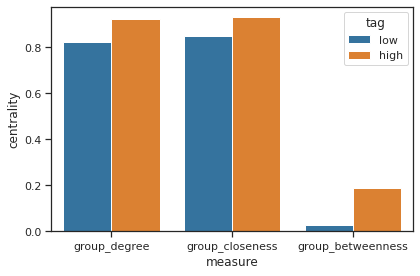

In [327]:
fig, ax = create_figure(1, 1, (6, 4), 'ticks')
sns.barplot(
    data=grp_cent_df,
    x='measure',
    y='centrality',
    hue='tag',
    palette='tab10',
    saturation=0.7,
    ax=ax,
)
plt.show()

In [354]:
high_ent = [
    mice.parcel.results['eroded_masks'][int(net.n2l[n].split('-')[-1])]
    for n in high_ent if str(315) in net.n2l[n]
]
low_ent = [
    mice.parcel.results['eroded_masks'][int(net.n2l[n].split('-')[-1])]
    for n in low_ent if str(315) in net.n2l[n]
]
mask_high_ent = functools.reduce(np.logical_or, high_ent)
mask_low_ent = functools.reduce(np.logical_or, low_ent)

In [355]:
_ = parcel2html(
    masks={0: mask_high_ent},
    save_dir=extras_dir,
    save_name='high_entropy',
    cmap=sns.light_palette('C3', as_cmap=True, reverse=True),
    alpha=0.8,
    alpha_base=0.2,
    alpha_root=0.1,
)

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/high_entropy_k1.html

In [356]:
_ = parcel2html(
    masks={0: mask_low_ent},
    save_dir=extras_dir,
    save_name='low_entropy',
    cmap=sns.light_palette('C0', as_cmap=True, reverse=True),
    alpha=0.8,
    alpha_base=0.2,
    alpha_root=0.1,
)

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/low_entropy_k1.html

In [191]:
import networkx.algorithms.community as nx_comm

In [ ]:
nx.group_degree_centrality()

In [ ]:
a = 'degree'
b = 'eigenvector'

_df = cent_df.loc[cent_df.measure.isin([a, b])]
_df = _df.groupby(['node', 'measure']).mean().unstack()
_df = _df.centrality

x = _df.loc[:, a].values.reshape(-1, 1)
y = _df.loc[:, b].values.reshape(-1, 1)
lm = LinearRegression().fit(x, y)

fig, ax = create_figure(1, 1)

sns.regplot(
    data=_df,
    x=a,
    y=b,
    ax=ax,
)
ax.set_aspect(1 / ax.get_data_ratio())
ax.set_title(f"r = {lm.coef_.item():.2f}")
ax.set_xlabel(a)
ax.set_ylabel(b)
plt.show()

### Compare centroids and memship_vol (old stuff)

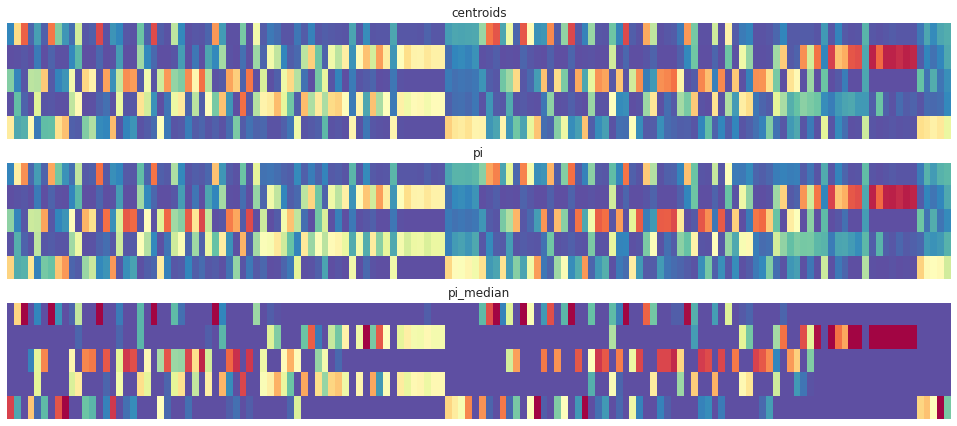

In [16]:
fig, axes = create_figure(3, 1, (13.5, 6), 'white')
data = {
    'centroids': svinet.centroids,
    'pi': svinet.pi,
    'pi_median':np.median(svinet.pi_all, axis=0),
}
for ax, (lbl, x) in zip(axes, data.items()):
    im = ax.imshow(x, cmap='Spectral_r', aspect=3.4, vmin=0, vmax=1)
    ax.set_title(lbl)
remove_ticks(axes)

In [17]:
def snr_plot(arrs, labels, sort: bool = False, sort_idx: int = 0):
    data = dict(zip(labels, arrs))
    ncols, nrows = len(data), 1
    fig, axes = create_figure(
        ncols,
        nrows,
        (13, 2 * ncols),
        'white',
        'col',
        tight_layout=False,
        constrained_layout=True,
    )
    for i, (ax, (lbl, x)) in enumerate(zip(axes, data.items())):
        cmap = sns.cubehelix_palette(
            start=i,
            rot=.7,
            dark=0.0,
            light=0.95,
            reverse=True,
            as_cmap=True,
        )
        if sort:
            x = [
                np.reshape([
                    e for _, e in
                    sorted(zip(arrs[sort_idx][j], x[j]))
                ], (1, -1))
                for j in range(num_comm)
            ]
            x = np.concatenate(x)
        im = ax.imshow(x, vmin=0, cmap=cmap)
        plt.colorbar(im, ax=ax, pad=0.01)
        ax.set_title(lbl, fontsize=14, y=1.02)
        ax.set(
            xticks=range(0, x.shape[1], 10),
            yticks=range(len(x)),
            yticklabels=[f"oc_{i}" for i in range(1, len(x)+1)],
            aspect=0.12 / ax.get_data_ratio(),
        )
    if sort:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('nodes', fontsize=14)
    plt.show()

In [18]:
pi_mu = np.mean(svinet.pi_all, axis=0)
pi_var = np.var(svinet.pi_all, axis=0)
snr = pi_mu ** 2 / np.maximum(pi_var, np.finfo(float).eps)

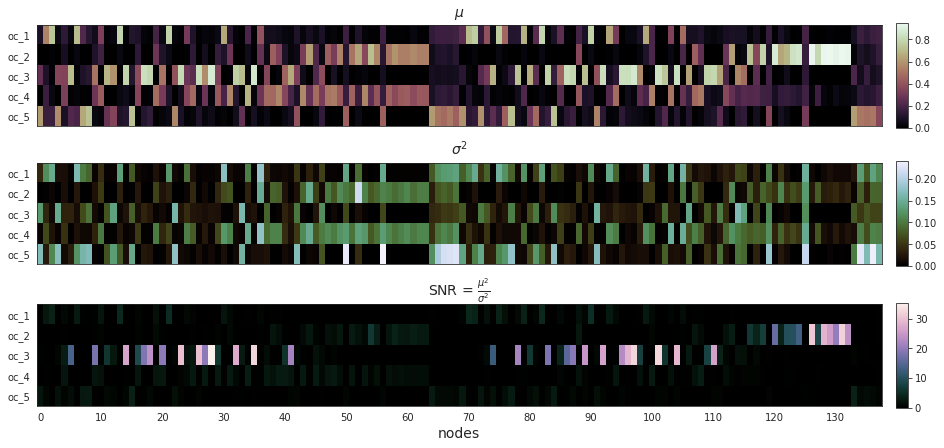

In [19]:
arrs = (pi_mu, pi_var, snr)
labels = (r'$\mu$', r'$\sigma^2$', r'SNR = $\frac{\mu^2}{\sigma^2}$')

snr_plot(arrs, labels)

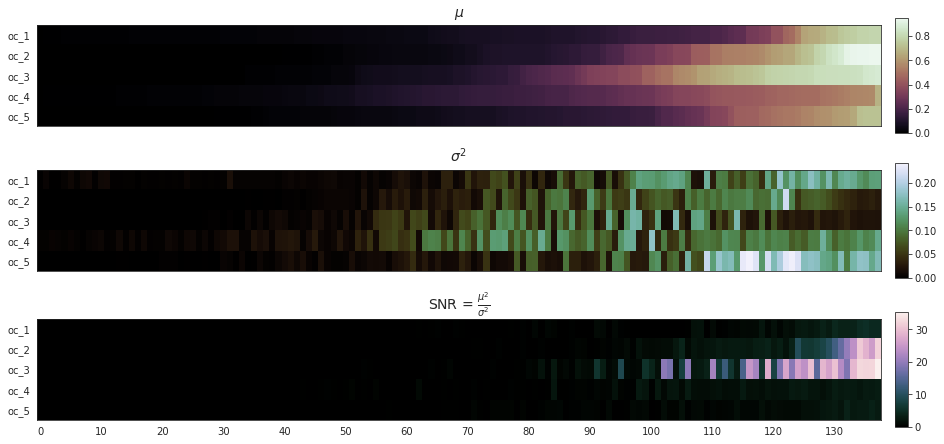

In [20]:
arrs = (pi_mu, pi_var, snr)
labels = (r'$\mu$', r'$\sigma^2$', r'SNR = $\frac{\mu^2}{\sigma^2}$')

snr_plot(arrs, labels, sort=True, sort_idx=0)

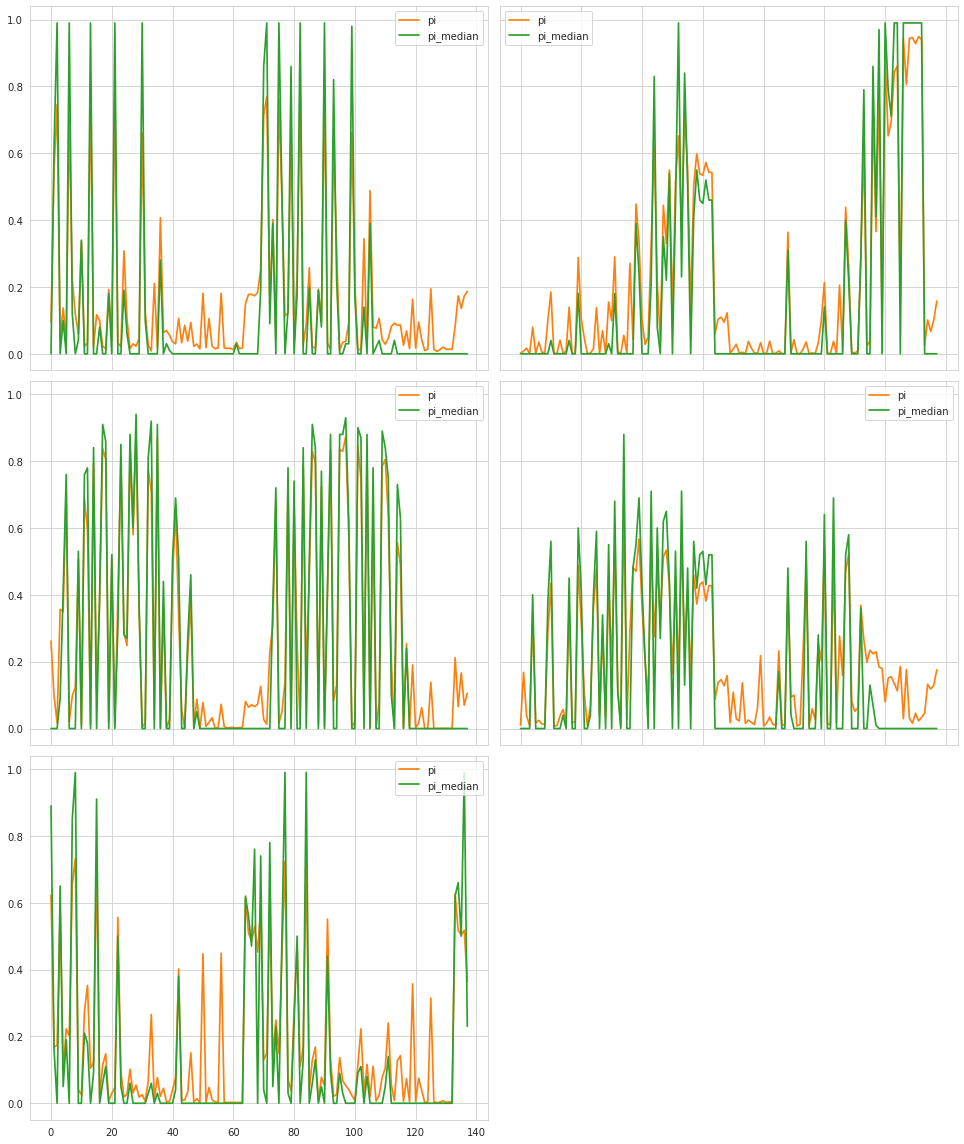

In [21]:
fig, axes = create_figure(3, 2, (13.5, 16), 'whitegrid', 'all', 'all')

for i, ax in zip(range(num_comm), axes.ravel()):
    for j, (lbl, x) in enumerate(data.items()):
        if lbl == 'centroids':
            continue
        ax.plot(x[i], color=f"C{j}", label=lbl, lw=1.7)
        ax.legend()
trim_axs(axes, num_comm)
plt.show()

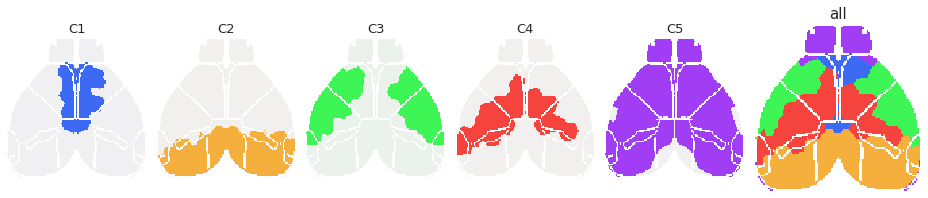

In [22]:
_ = svinet.plot_communities_2d(True)

In [23]:
bad = []
for idx, (i, j, k) in enumerate(zip(
    np.argmax(data['pi'], axis=0),
    np.argmax(data['pi_median'], axis=0),
    np.argmax(data['centroids'], axis=0), )):
    if not (i==k):
        bad.append(idx)
        print(idx, (i, j, k))


4
(2, 2, 3)

16
(2, 3, 3)

51
(1, 3, 3)

57
(1, 3, 3)

### Save for next time

In [97]:
mice = Mice(Config(512))
mice.combine_dfs('rest')

key = 'sub-SLC'
metric = 'spearman'
mode = 'bold'
net = Network(
    mice=mice,
    key=key,
    metric=metric,
    mode=mode,
    binarize=False,
).fit()

net.save_graphs(svinet_ws)

edge list 'bold_spearman_sub-SLC_n512_p30.txt' saved at
/home/hadi/Documents/workspaces/svinet/bold_spearman_sub-SLC_n512_p30

edge list 'bold_spearman_sub-SLC_n512_p25.txt' saved at
/home/hadi/Documents/workspaces/svinet/bold_spearman_sub-SLC_n512_p25

edge list 'bold_spearman_sub-SLC_n512_p20.txt' saved at
/home/hadi/Documents/workspaces/svinet/bold_spearman_sub-SLC_n512_p20

edge list 'bold_spearman_sub-SLC_n512_p15.txt' saved at
/home/hadi/Documents/workspaces/svinet/bold_spearman_sub-SLC_n512_p15

edge list 'bold_spearman_sub-SLC_n512_p10.txt' saved at
/home/hadi/Documents/workspaces/svinet/bold_spearman_sub-SLC_n512_p10